# Data Preprocessing Tools

## Importing the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gaurav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Dataset Loading

In [2]:



# Load the dataset
df = pd.read_csv('dataset/training.1600000.processed.noemoticon.csv', encoding='latin', header=None)

# Display the first few rows
df.head()


,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df = df.drop(['id', 'date', 'query','user_id'], axis = 1)
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [5]:
# Unique values in column 'sentiment'
print(df['sentiment'].unique())

[0 4]


In [6]:
# Map 0-negative, 4-positive
df['sentiment'] = df['sentiment'].map({0: 'negative', 4: 'positive'})
print(df)

        sentiment                                               text
0        negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1        negative  is upset that he can't update his Facebook by ...
2        negative  @Kenichan I dived many times for the ball. Man...
3        negative    my whole body feels itchy and like its on fire 
4        negative  @nationwideclass no, it's not behaving at all....
...           ...                                                ...
1599995  positive  Just woke up. Having no school is the best fee...
1599996  positive  TheWDB.com - Very cool to hear old Walt interv...
1599997  positive  Are you ready for your MoJo Makeover? Ask me f...
1599998  positive  Happy 38th Birthday to my boo of alll time!!! ...
1599999  positive  happy #charitytuesday @theNSPCC @SparksCharity...

[1600000 rows x 2 columns]


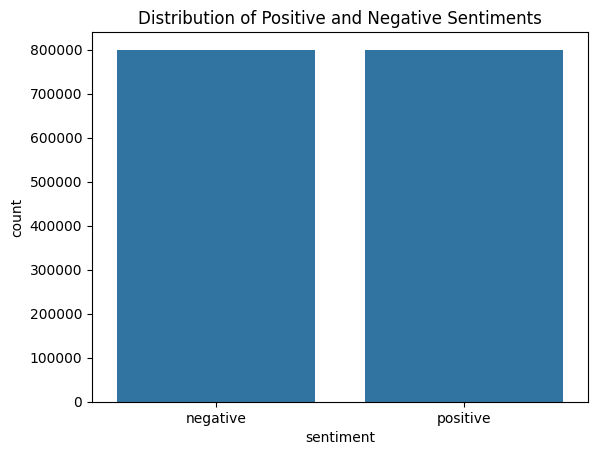

In [7]:
# Distribution of positive and negative sentiments
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Positive and Negative Sentiments')
plt.show()

# Preprocessing

In [8]:
# Removing URLs, Mentions and Websites
def remove_url_mention(text):
    # Define regex patterns
    url_pattern = r'https?://\S+|www\.\S+'
    mention_pattern = r'@\w+'
    site_pattern = r'\b\w+\.com\b'
    
    # Remove URLs, mentions, websites
    text = re.sub(url_pattern, '', text)  
    text = re.sub(mention_pattern, '', text) 
    text = re.sub(site_pattern, '', text)
    
    return text.strip()

df['wo_url'] = df['text'].apply(lambda text: remove_url_mention(text))

In [9]:
# Remove Punctuations
translator = str.maketrans('', '', string.punctuation)

df['wo_punc'] = df['wo_url'].apply(lambda text: text.translate(translator))

In [10]:
# Remove Stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

df["wo_stop"] = df["wo_punc"].apply(lambda text: remove_stopwords(text))

In [11]:
""""
Stemming is performed to reduce words to their base or root form, which helps in normalizing text data. This ensures that words like "running," "runner," and "ran" are all treated as the same word ("run"), reducing vocabulary size and making the model more efficient by focusing on the core meaning rather than different word forms.

Also Lemmatization can be performed, which reduces word to dictionary form. Unlike stemming, which simply cuts off word endings, lemmatization considers the context and meaning of words, ensuring that different forms of a word (like "am," "are," "is") are all converted to their base form ("be").

Lemmatization is more accurate but is more time consuming, so here working with large dataset I preffered Stemming.
"""

'"\nStemming is performed to reduce words to their base or root form, which helps in normalizing text data. This ensures that words like "running," "runner," and "ran" are all treated as the same word ("run"), reducing vocabulary size and making the model more efficient by focusing on the core meaning rather than different word forms.\n\nAlso Lemmatization can be performed, which reduces word to dictionary form. Unlike stemming, which simply cuts off word endings, lemmatization considers the context and meaning of words, ensuring that different forms of a word (like "am," "are," "is") are all converted to their base form ("be").\n\nLemmatization is more accurate but is more time consuming, so here working with large dataset I preffered Stemming.\n'

In [12]:
# Apply Stemming
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["cleaned_text"] = df["wo_stop"].apply(lambda text: stem_words(text))
print(df)

        sentiment                                               text  \
0        negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1        negative  is upset that he can't update his Facebook by ...   
2        negative  @Kenichan I dived many times for the ball. Man...   
3        negative    my whole body feels itchy and like its on fire    
4        negative  @nationwideclass no, it's not behaving at all....   
...           ...                                                ...   
1599995  positive  Just woke up. Having no school is the best fee...   
1599996  positive  TheWDB.com - Very cool to hear old Walt interv...   
1599997  positive  Are you ready for your MoJo Makeover? Ask me f...   
1599998  positive  Happy 38th Birthday to my boo of alll time!!! ...   
1599999  positive  happy #charitytuesday @theNSPCC @SparksCharity...   

                                                    wo_url  \
0        - Awww, that's a bummer.  You shoulda got Davi...   
1        is

In [13]:
# Using Only 20% of Dataset
df_sampled = df.sample(frac=0.2, random_state=42)
X = df_sampled['cleaned_text']
y = df_sampled['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(256000,)
(64000,)


In [14]:
# Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

vocab_size = len(vectorizer.vocabulary_)
print(f'Vocabulary Size: {vocab_size}')

Vocabulary Size: 106574


# Random Forest Classifier

In [15]:
# Model training
model = RandomForestClassifier(n_estimators=20)
history = model.fit(X_train_vec, y_train)

In [16]:
# Model evaluation
y_pred = model.predict(X_test_vec)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.75396875
              precision    recall  f1-score   support

    negative       0.74      0.78      0.76     31912
    positive       0.77      0.72      0.75     32088

    accuracy                           0.75     64000
   macro avg       0.75      0.75      0.75     64000
weighted avg       0.75      0.75      0.75     64000



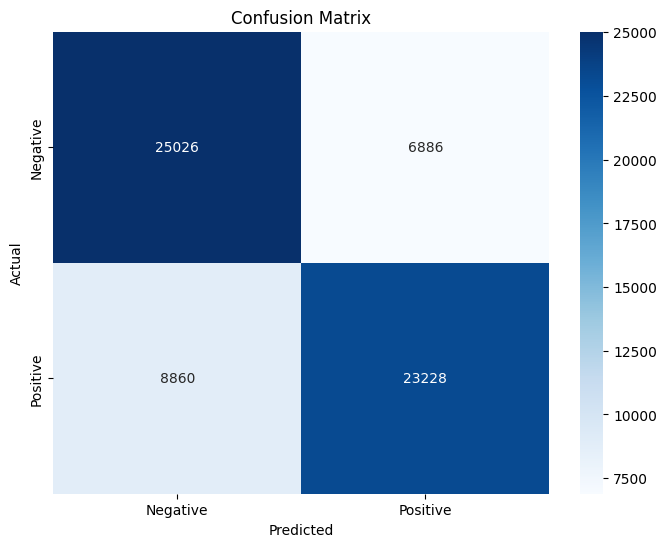

In [17]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Naive Byes

In [18]:
# Split dataset and vectorize features
X_nb = df['cleaned_text']
y_nb = df['sentiment']

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.3, random_state=42)

vectorizer_nb = TfidfVectorizer()
X_train_vec_nb = vectorizer.fit_transform(X_train_nb)
X_test_vec_nb = vectorizer.transform(X_test_nb)

# Model Training
model = MultinomialNB()
model.fit(X_train_vec_nb, y_train_nb)

MultinomialNB()

In [19]:
# Model evaluation
y_pred_nb = model.predict(X_test_vec_nb)
print(f'Accuracy: {accuracy_score(y_test_nb, y_pred_nb)}')
print(classification_report(y_test_nb, y_pred_nb))

Accuracy: 0.7610104166666667
              precision    recall  f1-score   support

    negative       0.75      0.78      0.77    239361
    positive       0.77      0.74      0.76    240639

    accuracy                           0.76    480000
   macro avg       0.76      0.76      0.76    480000
weighted avg       0.76      0.76      0.76    480000



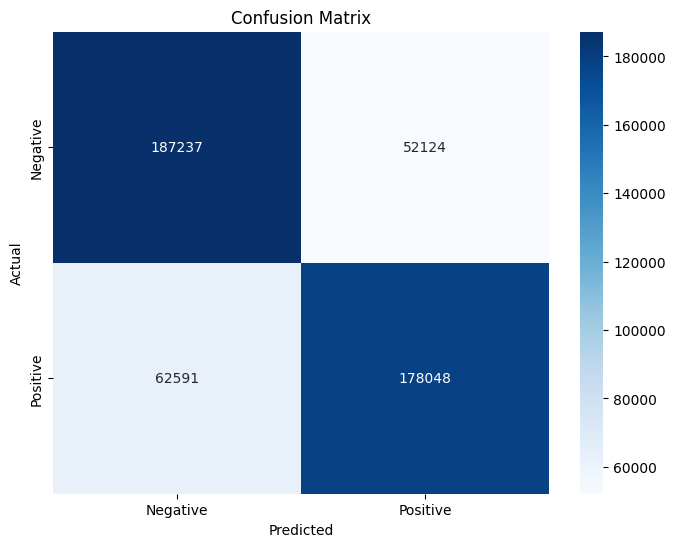

In [20]:
cm = confusion_matrix(y_test_nb, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

In [22]:
X_logistic_regression = df['cleaned_text']
y_logistic_regression = df['sentiment']

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_logistic_regression, 
    y_logistic_regression, 
    test_size = 0.3, 
    random_state = 1
)
vectorizer_lr  = TfidfVectorizer()
X_train_vec_lr = vectorizer.fit_transform(X_train_lr)
X_test_vec_lr  = vectorizer.transform(X_test_lr)


In [30]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_vec_lr, y_train_lr)

LogisticRegression(random_state=0)

In [32]:
y_pred_lr = classifier.predict(X_test_vec_lr)
print(accuracy_score(y_test_lr, y_pred_lr))

0.7816125


In [33]:
print(classification_report(y_test_lr, y_pred_lr))

              precision    recall  f1-score   support

    negative       0.79      0.76      0.78    239996
    positive       0.77      0.80      0.79    240004

    accuracy                           0.78    480000
   macro avg       0.78      0.78      0.78    480000
weighted avg       0.78      0.78      0.78    480000



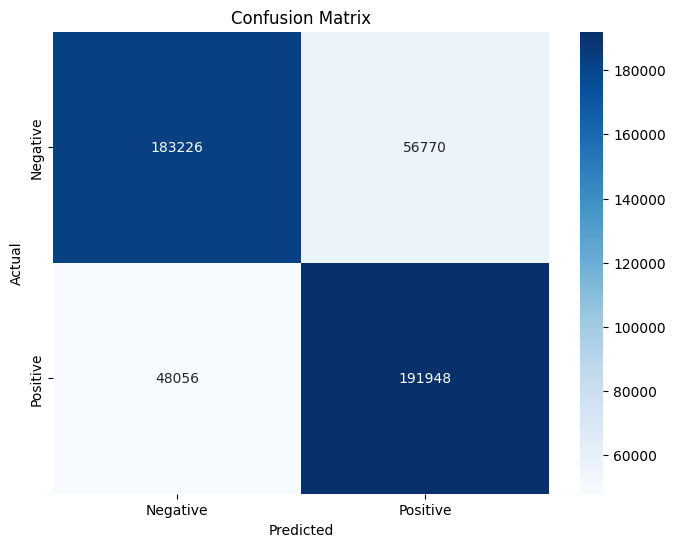

In [28]:
cm = confusion_matrix(y_test_lr, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()